In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv" , parse_dates=['Order Date'])

# Tasks to achieve

* What is the best-selling book?
* Visualize order status frequency
* Find a correlation between date and time with order status
* Find a correlation between city and order status
* Find any hidden patterns that are counter-intuitive for a layman
* Can we predict number of orders, or book names in advance?Tasks to achieve



In [3]:
df.head()

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,2021-01-20 17:43:00,Swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 13:37:00,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,2021-01-20 10:48:00,Karachi
3,70959,Completed,R ka Taaruf,2021-01-20 10:32:00,Karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 10:29:00,Karachi


### Rename the column names.

In [4]:
df.rename({"Order Number" : "Order_Number" , "Order Status" : "Order_Status"  , "Book Name" : "Book_Name" ,
           "Order Date" : "Order_Date" , "City (Billing)" : "City" } , axis = 1 , inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19187 entries, 0 to 19186
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_Number  19187 non-null  int64         
 1   Order_Status  19187 non-null  object        
 2   Book_Name     19185 non-null  object        
 3   Order_Date    19187 non-null  datetime64[ns]
 4   City          19186 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 749.6+ KB


 ### check the null values in the dataset

In [6]:
df.isnull().sum()

Order_Number    0
Order_Status    0
Book_Name       2
Order_Date      0
City            1
dtype: int64

In [7]:
row , col  = df.shape

print(f"there are {row} rows and {col} columns")

there are 19187 rows and 5 columns


### explore the null values to understand.

In [8]:
df[df["Book_Name"].isnull()]

,Order_Number,Order_Status,Book_Name,Order_Date,City
2206,67823,Returned,NaN,2021-01-02 20:31:00,Karachi
6835,60457,Returned,NaN,2020-11-14 00:00:00,Dera Ismail Khan


In [9]:
df[df["City"].isnull()]

,Order_Number,Order_Status,Book_Name,Order_Date,City
3919,65221,Completed,"Blockchain, Cryptocurrency And Bitcoin/R ka Ta...",2020-12-17 07:18:00,NaN


### Drop all na values from columns.

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Order_Number    0
Order_Status    0
Book_Name       0
Order_Date      0
City            0
dtype: int64

In [12]:
pd.options.display.max_rows = None

In [13]:
df["Book_Name"].head(10)

0                  Column Nigari Kese Sekhain
1                      انٹرنیٹ سے پیسہ کمائیں
2         Justju ka safar-1/Waqfa e Pareshani
3                                 R ka Taaruf
4                      انٹرنیٹ سے پیسہ کمائیں
5      Blockchain, Cryptocurrency And Bitcoin
6                            Firdaus E Bareen
7                        Kaggle for Begginers
8    ڈیٹا سائنس/مشین لرننگ/QATRA QATRA QULZAM
9                          تذکرہ اولیائے جہلم
Name: Book_Name, dtype: object

In [14]:
df["Book_Name"].tail(10)

19177    (C++) ++سی/سی/A Brief History of Money/Band ka...
19178    Har Shaye Ka Nazria - ہر شے کا نظریہ/Molo Masa...
19179    Global Science - Issue 219/R ka Taaruf  آر کا ...
19180    Bitcoin Blockchain aur Crypto Currency - FREE ...
19181    Bit Coin Block Chain aur Crypto Currency بٹ کو...
19182    Bit Coin Block Chain aur Crypto Currency بٹ کو...
19183                                 Kaggle for Begginers
19184    Kaggle for Begginers/Bitcoin Blockchain aur Cr...
19185                                 Kaggle for Begginers
19186    Bitcoin Blockchain aur Crypto Currency - FREE ...
Name: Book_Name, dtype: object

### notes

### book name column are in different form like that   
* ڈیٹا سائنس/مشین لرننگ/QATRA QATRA QULZAM

* (C++)/ان پیج 2000/عبارت کیسے لکھیں رشید خان/نفسیات کے معما

* Waqfa e Pareshani/Artificial Intelligence/Python Programming/Introduction to Blockchain with Case Studies/اجالوں کا سفر/Book Band kamron ki Muhabbat/MAN CHALAY KAA SODAA 

* R ka Taaruf  آر کا تعارف/ڈیٹا سائنس ۔ ایک تعارف/Global Science - Issue 219

* Kaggle for Begginers/Introduction to Blockchain with Case Studies/Justju ka safar-1/ATOMIC HABITS/Bagh-o-bahar bachoon kay lay dil chisp kahanian/Badlo Soch Badlo Zindagi/Aik Yaadgar Mushaira/Fear Management - A Spiritual Insight into Overcoming Your Fear  
### changed books name into single book like that.
* ڈیٹا سائنس/مشین لرننگ/QATRA QATRA QULZAM -> مشین لرننگ
### there are incorrect name of book also.
* "r ka taaruf  آر کا تعارف" -> r ka taaruf

* "انٹرنیٹ سے پیسہ کمائیں؟- مستحقین زکواة -> ""

* python programming- release date: august 14, 2020 -> python programming

* linux - an introduction (release data - october 3, 2020) -> linux - an introduction


### There are 4082 unique cities names.

In [15]:
len(df["City"].unique())

4082

### There are 3509 unique books names.

In [16]:
len(df["Book_Name"].unique())

3509

### Convert entries into lower case.

In [17]:
df["Book_Name"] = df["Book_Name"].str.lower()

### remove special character from book column.

In [18]:
df["Book_Name"] = df["Book_Name"].str.replace("(" , "").str.replace(")" , "")
df["Book_Name"] = df["Book_Name"].str.replace("[" , "").str.replace("]" , "")

### Renames some books names which names are not correct.

In [19]:
df["Book_Name"] = df["Book_Name"].str.replace("python programming- release date: august 14, 2020" , "python programming")
df["Book_Name"] = df["Book_Name"].str.replace("انٹرنیٹ سے پیسہ کمائیں؟- مستحقین زکواة" , "")
df["Book_Name"] = df["Book_Name"].str.replace("molo masali - مولو مصلی" , "molo masali" )
df["Book_Name"] = df["Book_Name"].str.replace("r ka taaruf  آر کا تعارف" , "r ka taaruf")
df["Book_Name"] = df["Book_Name"].str.replace("linux - an introduction release data - october 3, 2020" , "linux - an introduction")

In [20]:
df["Book_Name"].value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    2574
python programming                        1885
blockchain, cryptocurrency and bitcoin    1064
product management                        1041
artificial intelligence                    899
justju ka safar-1                          881
molo masali                                534
ڈیٹا سائنس ۔ ایک تعارف                     495
lucky draw - free book                     487
column nigari kese sekhain                 416
Name: Book_Name, dtype: int64

### There are multiple book names in a single row tried to correct them.

### Sepraate the books in each order on "/".

In [21]:
for i in df["Book_Name"].tail(10).str.split("/"):
    print(i)

['c++ ++سی', 'سی', 'a brief history of money', 'band kamron ki muhabbat', 'bit coin block chain aur crypto currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی', 'introduction to blockchain with case studies', 'kaggle for begginers', 'safar e hajj سفر حج', 'shaoor شعور۔ علم سے آگہی کا سفر']
['har shaye ka nazria - ہر شے کا نظریہ', 'molo masali']
['global science - issue 219', 'r ka taaruf']
['bitcoin blockchain aur crypto currency - free e-book']
['bit coin block chain aur crypto currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی', 'kaggle for begginers', 'c++ ++سی', 'سی', 'introduction to blockchain with case studies']
['bit coin block chain aur crypto currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی']
['kaggle for begginers']
['kaggle for begginers', 'bitcoin blockchain aur crypto currency - free e-book']
['kaggle for begginers']
['bitcoin blockchain aur crypto currency - free e-book']


 #### Book names are now look good each book in a separate row. 

In [22]:
df["Book_Name"].str.split("/").str[0].head(10)

0                column nigari kese sekhain
1                    انٹرنیٹ سے پیسہ کمائیں
2                         justju ka safar-1
3                               r ka taaruf
4                    انٹرنیٹ سے پیسہ کمائیں
5    blockchain, cryptocurrency and bitcoin
6                          firdaus e bareen
7                      kaggle for begginers
8                                ڈیٹا سائنس
9                        تذکرہ اولیائے جہلم
Name: Book_Name, dtype: object

#### Update the Book_Name column.

In [23]:
df["Book_Name"] = df["Book_Name"].str.split("/").str[0]

In [24]:
df["Book_Name"].value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    3029
python programming                        2177
artificial intelligence                   1309
blockchain, cryptocurrency and bitcoin    1287
product management                        1141
justju ka safar-1                         1040
molo masali                                575
ڈیٹا سائنس ۔ ایک تعارف                     541
lucky draw - free book                     505
c++                                        468
Name: Book_Name, dtype: int64

### clean the  book name column and reduce the unique names of book to 3509 to 665

In [25]:
df.Book_Name.nunique()

665

### notes

### in city column there is huge amount of name of cities is wrong and multiple mistake are there like.

#### there are  villages , district  , tehsil , town names are also connect with city name that the real problem also.

####  in many places banks name  , colony name  are also in the city column

####  different country , town , city name also  ->abu dhabi , , london , northyork ,  mississauga 

#### province name of  pakistan punjab  , sindh  , balochistan , kpk , ajk

####  karachi -> khi , hub ,hub chowki , gulistane -johar , gulzare hijiri , gulshan -e- iqbal , "jahangiria ship malir ext near sokarachio" , "malir" , "orangi" , "azizabad" , "north nazimabad"

#### lahore -> lhr , valencia/lahore , Midel town lahore , Township Lahore

####  hydrabad -> hyd , hydrabadad , hydrabd , hydra bad 

#### islamabad ->  islambad , lslamababd , islama  bad , alkhidmat raazi hospital cbr

#### faislabad -> fsd , the four seasons sumandri road faislabad , faislabad faislabad 

#### peshawar ->canal raod peshawar , university peshawar

##### dera ghazi khan -> dg khan , d g khan , deraghazikhan , dera ghazi khan kahn , mangrotha east thesil taunsa district dera ghazi khan khan

#### special character ->  "." , "/" , ":" , "," ,"()" ,"[]" also.

#### continue.....

#### maximam city name are incorrect .

In [26]:
df.City.sample(20)

11194                                             Gilgit
14582                                             Lahore
12867                                            Karachi
16567                                             Lahore
7252                                             Karachi
8647                                           Islamabad
14593                                             Taxila
5381                                              Lahore
8564                                           Hyderabad
3100                                            Peshawar
1038                                  Hazara town quetta
16333                                              Okara
11295                                          Ljubljana
17746                                     Rahim Yar Khan
6147                                               Shwal
1285                                          Rawalpindi
5527                                           Islamabad
416                            

#### Convert entries into lower case and remove blank spaces and special character.

In [27]:
df["City"] = df["City"].str.lower().str.replace("," , "").str.replace("?" , "").str.replace("\d+" , "").str.replace("[" , "").str.replace("]" , "").str.strip()

In [28]:
df["City"].value_counts().head(10)

karachi       2665
lahore        2179
islamabad      947
rawalpindi     696
faisalabad     521
peshawar       493
multan         461
gujranwala     278
hyderabad      265
               254
Name: City, dtype: int64

#### With the help of this list try to clean the cities names.

##### list of pakistani cities obtained from https://gist.github.com/malikbilal1997/4f41d4d153fca7087a8875cac7db8836

In [29]:
pak_cities = ['islamabad', 'ahmed nager chatha', 'ahmadpur east', 'ali khan abad', 'alipur', 'arifwala', 'attock', 'bhera',
              'bhalwal', 'bahawalnagar','bahawalpur', 'bhakkar', 'burewala', 'chillianwala', 'chakwal', 'chichawatni',
              'chiniot', 'chishtian',
              'daska', 'darya khan', 'dera ghazi khan', 'dhaular', 'dina', 'dinga', 'dipalpur', 'faisalabad', 'ferozewala',
              'fateh jhang','ghakhar mandi', 'gojra', 'gujranwala', 'gujrat', 'gujar khan', 'hafizabad', 'haroonabad', 'hasilpur',
              'haveli lakha', 'jatoi',
              'jalalpur', 'jattan', 'jampur', 'jaranwala', 'jhang', 'jhelum', 'kalabagh', 'karor lal esan', 'kasur', 'kamalia', 'kamoke',
              'khanewal',
              'khanpur', 'kharian', 'khushab', 'kot addu', 'jauharabad', 'lahore', 'lalamusa', 'layyah', 'liaquat pur',
              'lodhran', 'malakwal', 'mamoori', 'mailsi', 'mandi bahauddin', 'mian channu', 'mianwali', 'multan', 'murree', 
              'muridke', 'mianwali bangla', 'muzaffargarh', 'narowal', 'nankana sahib', 'okara', 'renala khurd', 'pakpattan', 
              'pattoki', 'pir mahal', 'qaimpur', 'qila didar singh', 'rabwah', 'raiwind', 'rajanpur', 'rahim yar khan',
              'rawalpindi',
              'sadiqabad', 'safdarabad', 'sahiwal', 'sangla hill', 'sarai alamgir', 'sargodha', 'shakargarh', 'sheikhupura',
              'sialkot',
              'sohawa', 'soianwala', 'siranwali', 'talagang', 'taxila', 'toba tek singh', 'vehari', 'wah cantonment', 
              'wazirabad',
              'badin', 'bhirkan', 'rajo khanani', 'chak', 'dadu', 'digri', 'diplo', 'dokri', 'ghotki', 'haala', 'hyderabad',
              'islamkot', 'jacobabad', 'jamshoro', 'jungshahi', 'kandhkot', 'kandiaro', 'karachi', 'kashmore', 'keti bandar',
              'khairpur', 'kotri', 'larkana', 'matiari', 'mehar', 'mirpur khas', 'mithani', 'mithi', 'mehrabpur', 'moro',
              'nagarparkar', 'naudero', 'naushahro feroze', 'naushara', 'nawabshah', 'nazimabad', 'qambar', 'qasimabad', 
              'ranipur', 'ratodero', 'rohri', 'sakrand', 'sanghar', 'shahbandar', 'shahdadkot', 'shahdadpur',
              'shahpur chakar', 'shikarpaur', 'sukkur', 'tangwani', 'tando adam khan', 'tando allahyar',
              'tando muhammad khan', 'thatta', 'umerkot', 'warah', 'abbottabad', 'adezai', 'alpuri', 'akora khattak',
              'ayubia', 'banda daud shah', 'bannu', 'batkhela', 'battagram', 'birote', 'chakdara', 'charsadda', 'chitral',
              'daggar', 'dargai', 'darya khan', 'dera ismail khan', 'doaba', 'dir', 'drosh', 'hangu', 'haripur', 'karak',
              'kohat', 'kulachi', 'lakki marwat', 'latamber', 'madyan', 'mansehra', 'mardan', 'mastuj', 'mingora', 'nowshera',
              'paharpur', 'pabbi', 'peshawar', 'saidu sharif', 'shorkot', 'shewa adda', 'swabi', 'swat', 'tangi', 'tank',
              'thall', 'timergara', 'tordher', 'awaran', 'barkhan', 'chagai', 'dera bugti', 'gwadar', 'harnai', 'jafarabad',
              'jhal magsi', 'kacchi', 'kalat', 'kech', 'kharan', 'khuzdar', 'killa abdullah', 'killa saifullah', 'kohlu',
              'lasbela', 'lehri', 'loralai', 'mastung', 'musakhel', 'nasirabad', 'nushki', 'panjgur', 'pishin valley', 
              'quetta', 'sherani', 'sibi', 'sohbatpur', 'washuk', 'zhob', 'ziarat']


In [30]:
df.head(10)

,Order_Number,Order_Status,Book_Name,Order_Date,City
0,70978,Completed,column nigari kese sekhain,2021-01-20 17:43:00,swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 13:37:00,karachi
2,70960,Completed,justju ka safar-1,2021-01-20 10:48:00,karachi
3,70959,Completed,r ka taaruf,2021-01-20 10:32:00,karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 10:29:00,karachi
5,70957,Completed,"blockchain, cryptocurrency and bitcoin",2021-01-20 10:24:00,karachi
6,70956,Completed,firdaus e bareen,2021-01-20 09:28:00,wah cantt taxila rawalpindi
7,70955,Completed,kaggle for begginers,2021-01-20 08:05:00,bahawalpur
8,70954,Completed,ڈیٹا سائنس,2021-01-20 05:48:00,lahore
9,70953,Completed,تذکرہ اولیائے جہلم,2021-01-20 04:20:00,matli


#### Apply a function on the city column to reduce incorrect cities names.

In [31]:
def clean_city(city):
    for i in pak_cities:
        if i in str(city):
            return i
    return city

In [32]:
df["City"] = df["City"].apply(clean_city)

In [33]:
###  reduce city names from 4082 to 1707

In [34]:
df["City"].nunique()

1707

 ###  use this advance nltk libraray which remove all incorrect names from city column.

In [35]:
import nltk

#### there are some other country ,cities , town name are also in this data remove that name.

In [36]:
def clean_city(row):
    address = row.City.split()
    add = set()
    for a in address:
        a = a.strip()
        if a:
            add.add(a)
    for city in pak_cities:
        if row.City.__contains__(city):
            return city
        
    for a in add:
        for c in pak_cities:
            if nltk.edit_distance(a, c) <= 15: # considering spelling mistakes upto 5 letters
                return c
    return row.City

In [37]:
df["City"] = df.apply(clean_city , axis = 1)

### Now all done with the city column.only 192 cities names are unique.


In [38]:
df.City.nunique()

192

In [39]:
df.groupby("City")["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False).head(10)

,City,Order_Number
60,islamabad,4353
79,karachi,2995
97,lahore,2391
152,rawalpindi,791
45,faisalabad,573
142,peshawar,543
123,multan,492
50,gujranwala,329
59,hyderabad,290
169,sialkot,289


### Now data is clean. we are good to go now.next step to address the queries.

### Break order_date column into day , month , year and time.

In [40]:
df["Order_Date"] = pd.DatetimeIndex(df["Order_Date"])
df["Year"] = df["Order_Date"].dt.year
df["Day"] = df["Order_Date"].dt.day_name()
df["Month"] = df["Order_Date"].dt.month_name()
df["Time"] = df["Order_Date"].dt.time
df["Hour"] = df["Order_Date"].dt.time
df["MY"]=pd.to_datetime(df['Order_Date']).dt.to_period('M')
df["MY"]= df["MY"].dt.strftime('%Y-%m')

In [41]:
df.head()

,Order_Number,Order_Status,Book_Name,Order_Date,City,Year,Day,Month,Time,Hour,MY
0,70978,Completed,column nigari kese sekhain,2021-01-20 17:43:00,swat,2021,Wednesday,January,17:43:00,17:43:00,2021-01
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 13:37:00,karachi,2021,Wednesday,January,13:37:00,13:37:00,2021-01
2,70960,Completed,justju ka safar-1,2021-01-20 10:48:00,karachi,2021,Wednesday,January,10:48:00,10:48:00,2021-01
3,70959,Completed,r ka taaruf,2021-01-20 10:32:00,karachi,2021,Wednesday,January,10:32:00,10:32:00,2021-01
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 10:29:00,karachi,2021,Wednesday,January,10:29:00,10:29:00,2021-01


# Visualize Order Status Frequency

In [42]:
df["Order_Status"].unique()

array(['Completed', 'Returned', 'Canceled'], dtype=object)

In [43]:
df["Order_Status"].value_counts()

Completed    17895
Returned      1261
Canceled        28
Name: Order_Status, dtype: int64

Completed orders are 17895
Returned orders are 1261
Canceled orders are 28


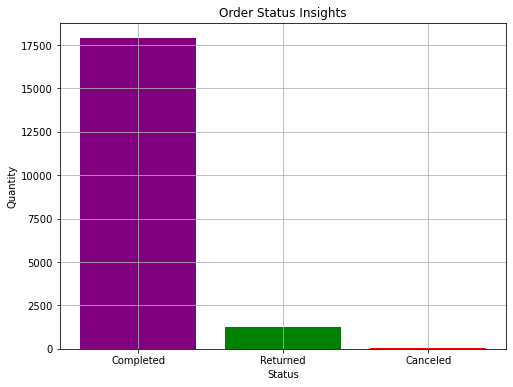

In [44]:
#First we check Number of completed, returned and cancelled orders
order_status = dict(df.value_counts('Order_Status'))
for key,value in order_status.items():
    print(f'{key} orders are {value}')

#Visualize completed, returned and cancelled orders
status = order_status.keys()
quantity = order_status.values()
plt.figure(figsize = (8,6))
plt.bar(status , quantity , color = ('Purple' , 'Green' , 'Red'))
plt.grid()
plt.xticks()
plt.yticks()
plt.title('Order Status Insights' )
plt.xlabel('Status' )
plt.ylabel('Quantity' )
plt.show()

In [45]:
df["Order_Date"].dt.year.unique()

array([2021, 2020, 2019])

## Order status per year

In [46]:
# reterive order status in 2019
# stats_19 = df[df['order_date'].dt.strftime("%Y") == "2019"].order_status  #FIRST METHOD
# # reterive order status in 2020
# stats_20 = df[df['order_date'].dt.strftime("%Y") == "2020"].order_status
# # reterive order status in 2021
# stats_21 = df[df['order_date'].dt.strftime("%Y") == "2021"].order_status

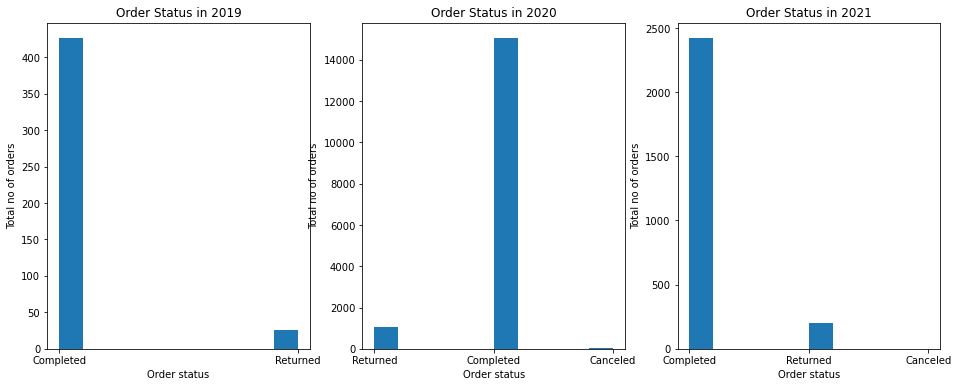

In [47]:
# reterive order status in 2019.
stats_2019 = df[df["Order_Date"].dt.year == 2019].Order_Status            # SECOND METHOD
# reterive order status in 2020.
stats_2020 = df[df["Order_Date"].dt.year == 2020].Order_Status
# reterive order status in 2021.
stats_2021 = df[df["Order_Date"].dt.year == 2021].Order_Status

# graph size
plt.figure(figsize=(16,6))
#histogram for 2019
plt.subplot(1,3,1)
plt.title('Order Status in 2019')
plt.xlabel('Order status')
plt.ylabel('Total no of orders')
plt.hist(stats_2019)


#histogram for 2020
plt.subplot(1,3,2)
plt.title('Order Status in 2020')
plt.xlabel('Order status')
plt.ylabel('Total no of orders')
plt.hist(stats_2020)


#histogram for 2021
plt.subplot(1,3,3)
plt.title('Order Status in 2021')
plt.xlabel('Order status')
plt.ylabel('Total no of orders')
plt.hist(stats_2021)
plt.show()

### Find the Correlation of returned books with book name, city and order_status.

In [48]:
df[df["Order_Status"] == "Returned"].Book_Name.value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    436
python programming                        147
blockchain, cryptocurrency and bitcoin    139
artificial intelligence                    52
product management                         37
مشین لرننگ                                 27
c++                                        25
column nigari kese sekhain                 25
ڈیٹا سائنس                                 25
lucky draw - free book                     23
Name: Book_Name, dtype: int64

### Find the Correlation of returned books with city. 

In [49]:
df[df["Order_Status"] == "Returned"].City.value_counts().head(10)

islamabad     442
karachi       132
lahore         97
rawalpindi     40
peshawar       37
multan         32
faisalabad     27
hyderabad      25
               23
gujranwala     17
Name: City, dtype: int64

### Find the Correlation of Completed books with book name.

In [50]:
df[df["Order_Status"] == "Completed"].Book_Name.value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    2590
python programming                        2025
artificial intelligence                   1252
blockchain, cryptocurrency and bitcoin    1146
product management                        1103
justju ka safar-1                         1025
molo masali                                564
ڈیٹا سائنس ۔ ایک تعارف                     525
lucky draw - free book                     482
c++                                        441
Name: Book_Name, dtype: int64

### Find the Correlation of returned books with City.

In [51]:
df[df["Order_Status"] == "Completed"].City.value_counts().head(10)

islamabad     3906
karachi       2859
lahore        2291
rawalpindi     749
faisalabad     545
peshawar       505
multan         460
gujranwala     312
sialkot        275
hyderabad      264
Name: City, dtype: int64

### Find the Correlation of Canceled books with book name.

In [52]:
df[df["Order_Status"] == "Canceled"].Book_Name.value_counts().head(10)

artificial intelligence                   5
python programming                        5
انٹرنیٹ سے پیسہ کمائیں                    3
c++                                       2
blockchain, cryptocurrency and bitcoin    2
the journey within                        2
gosha e tanhai                            2
harch                                     1
ارفع کریم                                 1
tarzan or wadi koh kaf                    1
Name: Book_Name, dtype: int64

### Find the Correlation of Canceled books with city.

In [53]:
df[df["Order_Status"] == "Canceled"].City.value_counts().head(10)

islamabad     5
karachi       4
lahore        3
rawalpindi    2
kasur         1
chiniot       1
hasilpur      1
sargodha      1
dir           1
jhang         1
Name: City, dtype: int64

# Top 10 selling books.

In [54]:
df["Book_Name"].value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    3029
python programming                        2177
artificial intelligence                   1309
blockchain, cryptocurrency and bitcoin    1287
product management                        1141
justju ka safar-1                         1040
molo masali                                575
ڈیٹا سائنس ۔ ایک تعارف                     541
lucky draw - free book                     505
c++                                        468
Name: Book_Name, dtype: int64

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1748 missing from current font.
  font.set_text(s, 0,

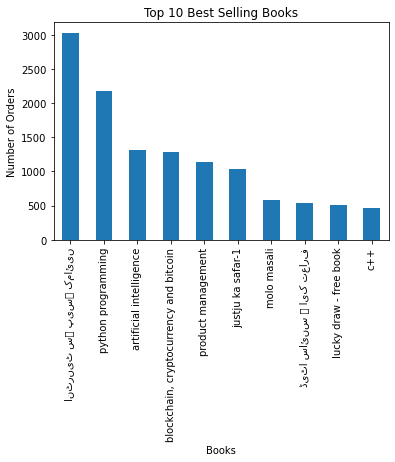

In [55]:
df["Book_Name"].value_counts().head(10).plot.bar()
plt.xticks()
plt.title("Top 10 Best Selling Books")
plt.xlabel("Books")
plt.ylabel("Number of Orders")
plt.show()


# Least 10 selling books.

In [56]:
df["Book_Name"].value_counts().tail(10)

bholi hui kahanian                      1
asihyai tahwar                          1
the picture of dorian gray              1
jazeeray ka samandar                    1
al-adab al-mufrad                       1
ibaarat kaise likhain                   1
har shaye ka nazria - ہر شے کا نظریہ    1
gulistan e saadi                        1
bacha khan ki aap beeti                 1
حیات حضرت خضر                           1
Name: Book_Name, dtype: int64

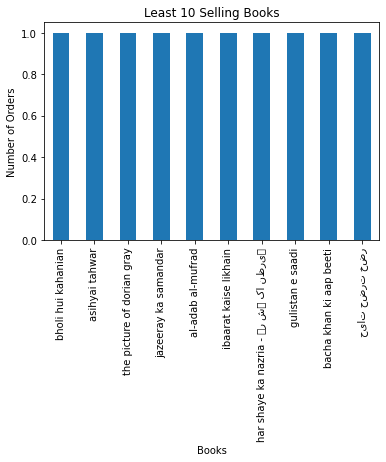

In [57]:
df["Book_Name"].value_counts().tail(10).plot.bar()
plt.xticks()
plt.title("Least 10 Selling Books")
plt.xlabel("Books")
plt.ylabel("Number of Orders")
plt.show()

# Top 10 best selling city.

In [58]:
df.City.value_counts().head(10).to_frame()

,City
islamabad,4353
karachi,2995
lahore,2391
rawalpindi,791
faisalabad,573
peshawar,543
multan,492
gujranwala,329
hyderabad,290
sialkot,289


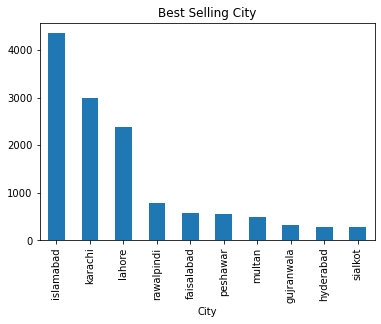

In [59]:
df.City.value_counts()[:10].plot.bar()
plt.xlabel("City")
plt.title("Best Selling City")
plt
plt.show()

## books sells in top most 10 cities

<AxesSubplot:ylabel='City'>

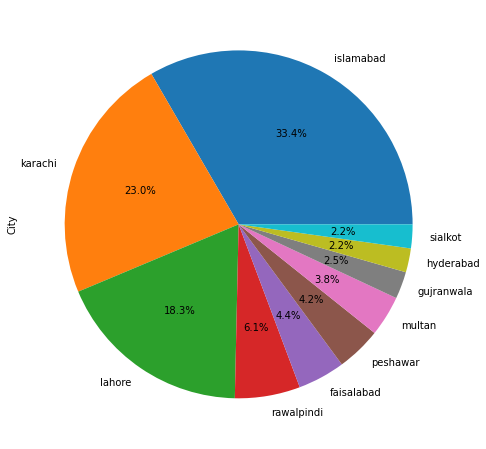

In [60]:
most_cities = df['City'].value_counts().head(10)
#pi-chart of top  most cities where books sold
most_cities.plot(kind='pie',figsize=(8,8),autopct='%1.1f%%')

### total num of books sold.

In [61]:
total_book_sold = df["Book_Name"].value_counts().sum()
print(f"In total ,{total_book_sold} book sold by Gufhtugu Publications from {df.Order_Date.min()} to {df.Order_Date.max()}")

In total ,19184 book sold by Gufhtugu Publications from 2019-10-03 15:03:00 to 2021-01-20 17:43:00


In [62]:
df.head()

,Order_Number,Order_Status,Book_Name,Order_Date,City,Year,Day,Month,Time,Hour,MY
0,70978,Completed,column nigari kese sekhain,2021-01-20 17:43:00,swat,2021,Wednesday,January,17:43:00,17:43:00,2021-01
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 13:37:00,karachi,2021,Wednesday,January,13:37:00,13:37:00,2021-01
2,70960,Completed,justju ka safar-1,2021-01-20 10:48:00,karachi,2021,Wednesday,January,10:48:00,10:48:00,2021-01
3,70959,Completed,r ka taaruf,2021-01-20 10:32:00,karachi,2021,Wednesday,January,10:32:00,10:32:00,2021-01
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 10:29:00,karachi,2021,Wednesday,January,10:29:00,10:29:00,2021-01


# Correlation between date and time with order status

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


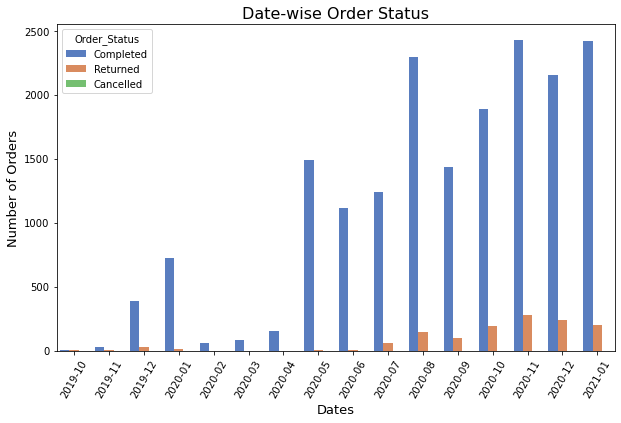

In [63]:
corr = df.groupby(["Order_Status","MY"])["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False)
corr=corr.sort_values("MY")

fig, ax = plt.subplots()
ax.set_xticklabels(corr["MY"], rotation=60)
fig.set_size_inches([10, 6])

ax = sns.barplot(x = "MY"  , y="Order_Number",hue="Order_Status",hue_order=["Completed", "Returned", "Cancelled"],data=corr,palette="muted")
ax.set_title('Date-wise Order Status',fontsize=16)
ax.set_xlabel("Dates",fontsize=13)
ax.set_ylabel("Number of Orders",fontsize=13) 
plt.show()

# Correlation between city and order status.

#### First break code into single row for checking is it working or not then combine into single code.

In [64]:
top_cities=df.groupby("City")["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False).head(10)

top_cities

,City,Order_Number
60,islamabad,4353
79,karachi,2995
97,lahore,2391
152,rawalpindi,791
45,faisalabad,573
142,peshawar,543
123,multan,492
50,gujranwala,329
59,hyderabad,290
169,sialkot,289


In [65]:
corr_ci_os= df.groupby(["City","Order_Status" ])["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False)
corr_ci_os

,City,Order_Status,Order_Number
102,islamabad,Completed,3906
137,karachi,Completed,2859
172,lahore,Completed,2291
267,rawalpindi,Completed,749
74,faisalabad,Completed,545
251,peshawar,Completed,505
218,multan,Completed,460
103,islamabad,Returned,442
80,gujranwala,Completed,312
293,sialkot,Completed,275


Text(0.5, 0, 'Top 10 Cities')

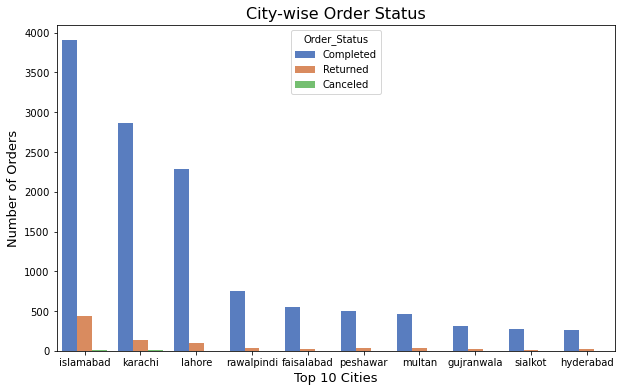

In [66]:
corr_ci_os= df.groupby(["City","Order_Status" ])["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False)
corr_ci_os = corr_ci_os[corr_ci_os["City"].isin(top_cities["City"])]
fig, ax = plt.subplots()
ax=sns.barplot(x="City",y="Order_Number",hue="Order_Status",data=corr_ci_os, palette="muted")
# ax.set_xticklabels(corr_ci_os["City"], rotation=90)
fig.set_size_inches([10, 6])
ax.set_title('City-wise Order Status',fontsize=16)
ax.set_ylabel("Number of Orders",fontsize=13) 
ax.set_xlabel("Top 10 Cities",fontsize=13)

## Next steps

###  Find any hidden patterns that are counter-intuitive for a layman
### Can we predict number of orders, or book names in advance?

## Upvote if you find the notebook interesting.